In [14]:
import numpy as np


alpha = 3/2
beta = 1
a = int(alpha)
b = beta + 1

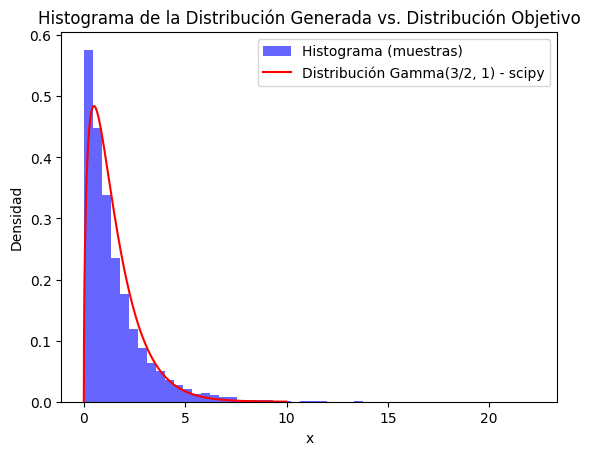

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma



# Función de densidad de la distribución objetivo (Gamma(3/2, 1))
def f(x):
    return (2 / np.sqrt(np.pi)) * np.sqrt(x) * np.exp(-x)

# Función de densidad de la distribución candidata (Gamma(1, 2))
def g(x):
    return x * np.exp(-x)

# Algoritmo de aceptación y rechazo
def accept_reject(n, seed=787):
    # Semilla para la generación de números aleatorios
    rng = np.random.default_rng(seed=787)
    samples = []
    M = 2 / np.sqrt(np.pi)
    
    while len(samples) < n:
        # Paso 1: Generar una muestra de la distribución candidata (Gamma(1, 2))
        Y = rng.gamma(1, 2)
        
        # Paso 2: Generar una variable aleatoria uniforme U
        U = rng.uniform(0, 1)
        
        # Paso 3: Aceptar o rechazar
        if U <= f(Y) / (M * g(Y)):
            samples.append(Y)
    
    return np.array(samples)

# Generar 10000 muestras
n_samples = 10000
samples = accept_reject(n_samples)

# Traficar el histograma
x = np.linspace(0, 10, 1000)

# Plot the histogram of the generated samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label='Histograma (muestras)')


# Plot the theoretical Gamma(3/2, 1) distribution using scipy.stats.gamma.pdf()
plt.plot(x, gamma.pdf(x, 3/2, scale=1), 'r-', label='Distribución Gamma(3/2, 1)')

plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.title('Histograma de la Distribución Generada vs. Distribución Objetivo')
plt.show()


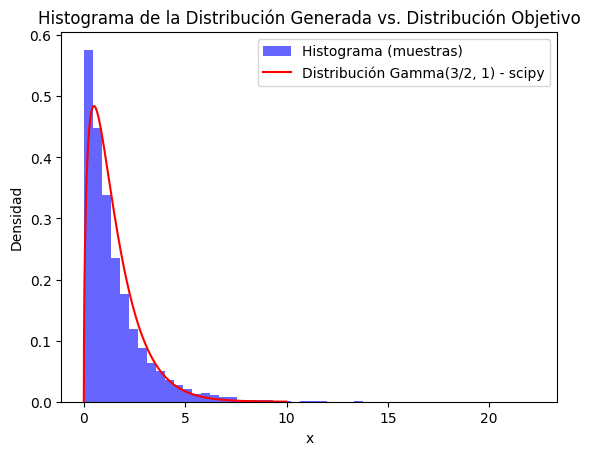

In [55]:
samples = accept_reject(10000)

# Traficar el histograma
x = np.linspace(0, 10, 1000)
plt.hist(
    samples,
    bins=50,
    density=True,
    alpha=0.6,
    color="b",
    label="Histograma (muestras)",
)
plt.plot(x, gamma.pdf(x, 3/2, scale=1), 'r-', label='Distribución Gamma(3/2, 1) - scipy')

plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.title("Histograma de la Distribución Generada vs. Distribución Objetivo")
plt.show()

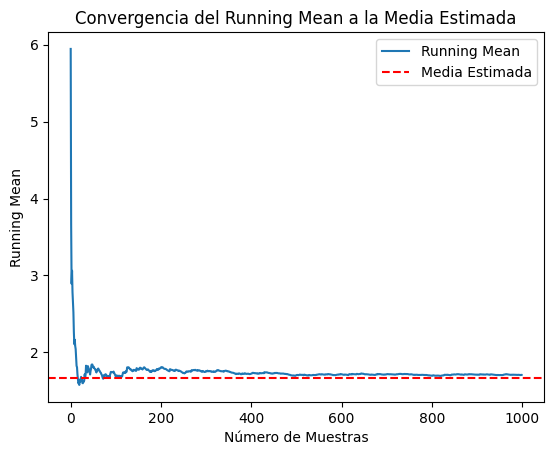

Estimación de E[X^2]: 4.2523655627931864


In [3]:

# Estimar E[X^2] y construir la gráfica de la convergencia de los "running means"
running_means = np.cumsum(samples) / np.arange(1, n_samples + 1)

# Graficar la convergencia
plt.plot(running_means[:1000], label="Running Mean")
plt.axhline(y=np.mean(samples), color='r', linestyle='--', label="Media Estimada")
plt.xlabel('Número de Muestras')
plt.ylabel('Running Mean')
plt.legend()
plt.title('Convergencia del Running Mean a la Media Estimada')
plt.show()

# Estimación de E[X^2]
E_X2_estimated = np.mean(samples**2)
print("Estimación de E[X^2]:", E_X2_estimated)

